<a href="https://colab.research.google.com/github/Davidsonity/Sentiment_Analysis-StrangerThings/blob/main/Notebook/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Sentiment Analysis Using Transformer model** ![twitter](https://github.com/Davidsonity/Sentiment_Analysis-StrangerThings/blob/main/images/twitter_logo.png?raw=1)

![ST4](https://media.giphy.com/media/l41Y9SKrl3kLVamfC/giphy.gif)

For this project, we will be performing data analysis on tweets about the netflix series "stranger things" as Season 4 just released on Netflix weeks days ago.
- Date of 1st half release: 2022-05-27
- Date of complete series release: 1st of July 2022
- Date of Project creation: 7th of july 2022
- Scraped Data: Most recent 50000 tweets from on Date of complete series release to Date of 1st half release

## **STAGE 1:** WebScraping using snscrape

### We start by importing the necessary libraries

In [ ]:
# Import necessary libraries
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt

### Now we begin Scraping!!!

In [ ]:
# scraping the data
query = "stranger things until:2022-07-02 since:2022-05-27"
limit = 100000
tweets = []
for tweet in tqdm(sntwitter.TwitterSearchScraper(query).get_items(), total = limit):
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content, tweet.lang])

100%|██████████| 100000/100000 [2:34:07<00:00, 10.81it/s] 


![hh](https://media.giphy.com/media/kYM7OxSxn1Tgkq8f4o/giphy.gif)

### Converting Scraped data to pandas DataFrame

In [ ]:
# Converting list of data to DataFrame
df = pd.DataFrame(tweets, columns = ['Date', 'User', 'Tweet', 'Language'])
df

,Date,User,Tweet,Language
0,2022-07-01 23:59:59+00:00,sshuasite,no quiero ver stranger things m da miedo nia,es
1,2022-07-01 23:59:59+00:00,UrFav3laa,يربي اي العظمة دي بجد اخر حلقة نزلت من strange...,ar
2,2022-07-01 23:59:59+00:00,LukeRoy26,*SPOILERS*\n#StrangerThings was awesome first ...,en
3,2022-07-01 23:59:59+00:00,Morgane_Stark,J’ai fini Stranger Things.,fr
4,2022-07-01 23:59:59+00:00,Verlaxify,STRANGER THINGS IS AMAZING!!! #StrangerThings4...,en
...,...,...,...,...
99995,2022-07-01 20:08:47+00:00,elaineskennedy,last episode of stranger things. not prepared.,en
99996,2022-07-01 20:08:47+00:00,ialissonn,terminei stranger things e EU NÃO TÔ BEM… netf...,pt
99997,2022-07-01 20:08:47+00:00,vangogtae,@vinizadaxx tava bem até assistir o final de s...,pt
99998,2022-07-01 20:08:47+00:00,DarthZiel,"With how things ended on sesson three, I wasn'...",en


### Storing and reloading data

In [ ]:
df.to_csv('strangerThing.csv', index=False)

In [ ]:
df = pd.read_csv('strangerThing.csv')
df

,Date,User,Tweet,Language
0,2022-07-01 23:59:59+00:00,sshuasite,no quiero ver stranger things m da miedo nia,es
1,2022-07-01 23:59:59+00:00,UrFav3laa,يربي اي العظمة دي بجد اخر حلقة نزلت من strange...,ar
2,2022-07-01 23:59:59+00:00,LukeRoy26,*SPOILERS*\n#StrangerThings was awesome first ...,en
3,2022-07-01 23:59:59+00:00,Morgane_Stark,J’ai fini Stranger Things.,fr
4,2022-07-01 23:59:59+00:00,Verlaxify,STRANGER THINGS IS AMAZING!!! #StrangerThings4...,en
...,...,...,...,...
99995,2022-07-01 20:08:47+00:00,elaineskennedy,last episode of stranger things. not prepared.,en
99996,2022-07-01 20:08:47+00:00,ialissonn,terminei stranger things e EU NÃO TÔ BEM… netf...,pt
99997,2022-07-01 20:08:47+00:00,vangogtae,@vinizadaxx tava bem até assistir o final de s...,pt
99998,2022-07-01 20:08:47+00:00,DarthZiel,"With how things ended on sesson three, I wasn'...",en


## **STAGE 2:** Performing Sentiment Analysis

![mm](https://c.tenor.com/yGqQN5P7O80AAAAC/see-you-on-the-other-side-steve-harrington.gif)

### Importing some more libraries

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

### Processing tweets(text) to best fit model

In [ ]:
# Tweets Preprocessing
def tweet_process(df):
    tweet_words = []
    tweet_sent = []
    for tweet in df:
        for word in tweet.split(' '):
            if word.startswith('@') and len(word) > 1:
                word = '@user'
            elif word.startswith('http'):
                word = 'http'
            tweet_words.append(word)
        tweet_proc = " ".join(tweet_words)
        tweet_sent.append(tweet_proc)
        tweet_words = []
    dff = pd.DataFrame({'processed_tweet' : tweet_sent})
    return dff

In [ ]:
df_tweet = tweet_process(df['Tweet'])
df_tweet

### Loading the Roberta Model

In [ ]:
# Loading model and tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [ ]:
# Run Reoberta model
def roberta(tweet):
    encoded_text = tokenizer(tweet, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'Negative' : scores[0],
        'Neutral' : scores[1],
        'Positive' : scores[2]
    }
    key = [k for k, v in scores_dict.items() if v == max(scores_dict.values())]
    key_dict = {
        'Sentiment': key[0]
    }
    scores_dict.update(key_dict)
    return scores_dict

In [ ]:
results = {}
for id, row in tqdm(df_tweet.iterrows(), total=len(df_tweet)):
    text = row['processed_tweet']
    result = roberta(text)
    results[id] = result

100%|██████████| 100000/100000 [2:55:12<00:00,  9.51it/s]  


In [ ]:
# Converting results to DataFrame
result_df = pd.DataFrame(results).T
result_df

,Negative,Neutral,Positive,Sentiment
0,0.133027,0.811901,0.055072,Neutral
1,0.218204,0.744088,0.037708,Neutral
2,0.350062,0.382242,0.267697,Neutral
3,0.076282,0.841153,0.082565,Neutral
4,0.001697,0.016374,0.981929,Positive
...,...,...,...,...
99995,0.734962,0.235791,0.029247,Negative
99996,0.776556,0.184498,0.038946,Negative
99997,0.067799,0.887601,0.0446,Neutral
99998,0.033607,0.188004,0.778389,Positive


In [ ]:
final_df = pd.concat([df, result_df], axis = 1)
final_df

,Date,User,Tweet,Language,Negative,Neutral,Positive,Sentiment
0,2022-07-01 23:59:59+00:00,sshuasite,no quiero ver stranger things m da miedo nia,es,0.133027,0.811901,0.055072,Neutral
1,2022-07-01 23:59:59+00:00,UrFav3laa,يربي اي العظمة دي بجد اخر حلقة نزلت من strange...,ar,0.218204,0.744088,0.037708,Neutral
2,2022-07-01 23:59:59+00:00,LukeRoy26,*SPOILERS*\n#StrangerThings was awesome first ...,en,0.350062,0.382242,0.267697,Neutral
3,2022-07-01 23:59:59+00:00,Morgane_Stark,J’ai fini Stranger Things.,fr,0.076282,0.841153,0.082565,Neutral
4,2022-07-01 23:59:59+00:00,Verlaxify,STRANGER THINGS IS AMAZING!!! #StrangerThings4...,en,0.001697,0.016374,0.981929,Positive
...,...,...,...,...,...,...,...,...
99995,2022-07-01 20:08:47+00:00,elaineskennedy,last episode of stranger things. not prepared.,en,0.734962,0.235791,0.029247,Negative
99996,2022-07-01 20:08:47+00:00,ialissonn,terminei stranger things e EU NÃO TÔ BEM… netf...,pt,0.776556,0.184498,0.038946,Negative
99997,2022-07-01 20:08:47+00:00,vangogtae,@vinizadaxx tava bem até assistir o final de s...,pt,0.067799,0.887601,0.0446,Neutral
99998,2022-07-01 20:08:47+00:00,DarthZiel,"With how things ended on sesson three, I wasn'...",en,0.033607,0.188004,0.778389,Positive


In [ ]:
final_df.to_csv('final_df.csv', index=False)

## **EDA and Visualization**

![vv](https://media.giphy.com/media/7wfWIcQyj2F68vmd18/giphy.gif)

## **NOTE:** The time range of the tweets in the dataset is;
- start: 2022-07-01 20:08:47, approximately = **8:08pm, 1st of July 2022**
- end: 2022-07-01 23:59:59, approximately = **11:59pm, 1st of July 2022**

In [ ]:
final_df = pd.read_csv('data/final_df.csv')

### Top 10 Languages

In [ ]:
lang_df = final_df.groupby('Language').count()

# Renaming index
lang_df.rename(index={'am': 'Amharic',
'ar': 'Arabic', 'bg': 'Bulgarian', 'ca': 'Catalan', 'cs': 'Czech', 'cy': 'Welsh', 'da': 'Danish', 'de': 'German', 'el': 'Greek',
'en': 'English', 'es': 'Spanish', 'et': 'Estonian', 'eu': 'Basque', 'fa': 'Persian', 'fi': 'Finnish', 'fr': 'French', 'gu': 'Gujarati',
'hi': 'Hindi', 'ht': 'Haitian', 'hu': 'Hungarian', 'in': 'Indonesian', 'is': 'Icelandic', 'it': 'Italian', 'iw': 'Hebrew',
'ja': 'Japanese', 'ko': 'Korean', 'lo': 'Lao', 'lt': 'Lithuanian', 'lv': 'Latvian', 'nl': 'Dutch', 'no': 'Norwegian', 'pl': 'Polish',
'pt': 'Portuguese', 'qam': 'qam', 'qht': 'qht', 'qme': 'qme', 'ro': 'Romanian', 'ru': 'Russian', 'sl': 'Slovenian', 'sr': 'Serbian',
'sv': 'Swedish', 'th': 'Thai', 'tl': 'Tagalog', 'tr': 'Turkish', 'uk': 'Ukrainian', 'und': 'Undetermined', 'ur': 'Urdu', 'vi': 'Vietnamese',
'zh': 'Chinese'}, inplace = True)

# Dropping unwanted index
lang_df = lang_df.drop(['Undetermined', 'qme', 'qam'])

# Arranging dataframe in descending order
lang_df = lang_df.sort_values('Sentiment', ascending = False).head(10)
lang_df

,Date,User,Tweet,Negative,Neutral,Positive,Sentiment
Language,,,,,,,
English,52723,52723,52723,52723,52723,52723,52723
Portuguese,24085,24085,24085,24085,24085,24085,24085
Spanish,12258,12258,12258,12258,12258,12258,12258
French,3079,3079,3079,3079,3079,3079,3079
Italian,2280,2280,2280,2280,2280,2280,2280
Polish,769,769,769,769,769,769,769
Turkish,542,542,542,542,542,542,542
German,488,488,488,488,488,488,488
Indonesian,359,359,359,359,359,359,359


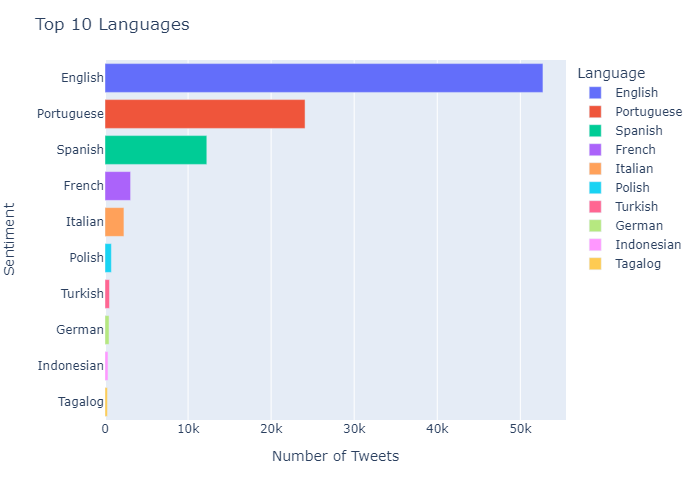

In [ ]:
fig = px.bar(lang_df,
             x = 'Sentiment',
             y = lang_df.index,
             color = lang_df.index,
             template = 'plotly',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Top 10 Languages',
    xaxis_title = 'Number of Tweets',
    yaxis_title = 'Sentiment'
)
   
# fig.show()
fig.show(renderer='png')

**Insights:** Between 8:08pm, 1st of July 2022 to 11:59pm, 1st of July 2022, \
English, Portuguese, Spanish, French and Italy are the top 5 languages.

### Bar Chart

In [ ]:
sentiment = final_df['Sentiment'].value_counts()
sentiment

Neutral     62629
Negative    22680
Positive    14691
Name: Sentiment, dtype: int64

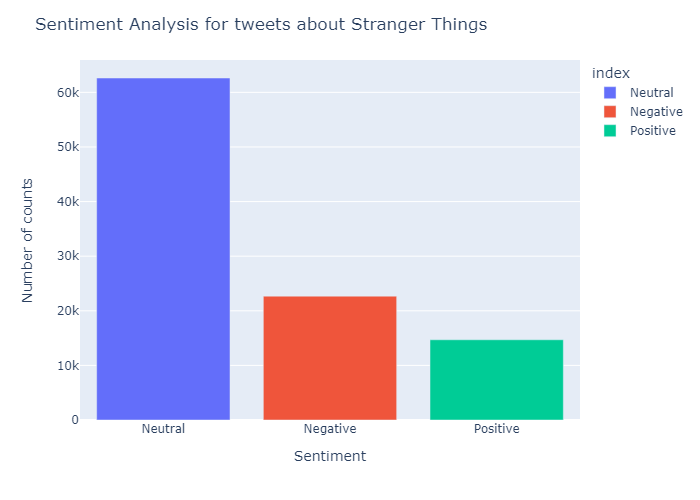

In [ ]:
fig = px.bar(sentiment,
             y='Sentiment',
             x=sentiment.index,
             color=sentiment.index,
             template = 'plotly',
             height = 500,
            width = 700
            )

fig.update_layout(
    title = 'Sentiment Analysis for tweets about Stranger Things',
    yaxis_title = 'Number of counts',
    xaxis_title = 'Sentiment'
)
   
# fig.show()
fig.show(renderer='png')

### Pie Chart

In [ ]:
compare_df = final_df[final_df['Sentiment'] != 'Neutral'].reset_index(drop=True)
pie_df = compare_df['Sentiment'].value_counts()
pie_df

Negative    22680
Positive    14691
Name: Sentiment, dtype: int64

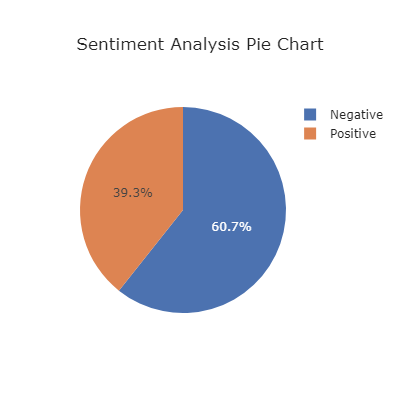

In [ ]:
fig = px.pie(pie_df,
             values = pie_df,
             title = 'Sentiment Analysis Pie Chart',
             names = pie_df.index,
             height = 400,
             width = 400,
             template = 'seaborn'
            )
fig.show(renderer='png')

### Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#Update stopword to filter wordcloud for better visualization
stopwords = set(STOPWORDS)
stopwords.update(["stranger", "things", "stranger things","StrangerThings", "Stranger_Things", 
                  "https", "t", "co", "season","de", "S", "m", "y"])

### Positive Sentiment Word Cloud

In [ ]:
pos_df = compare_df[compare_df["Sentiment"] == 'Positive'].reset_index(drop= True)
# pos_df

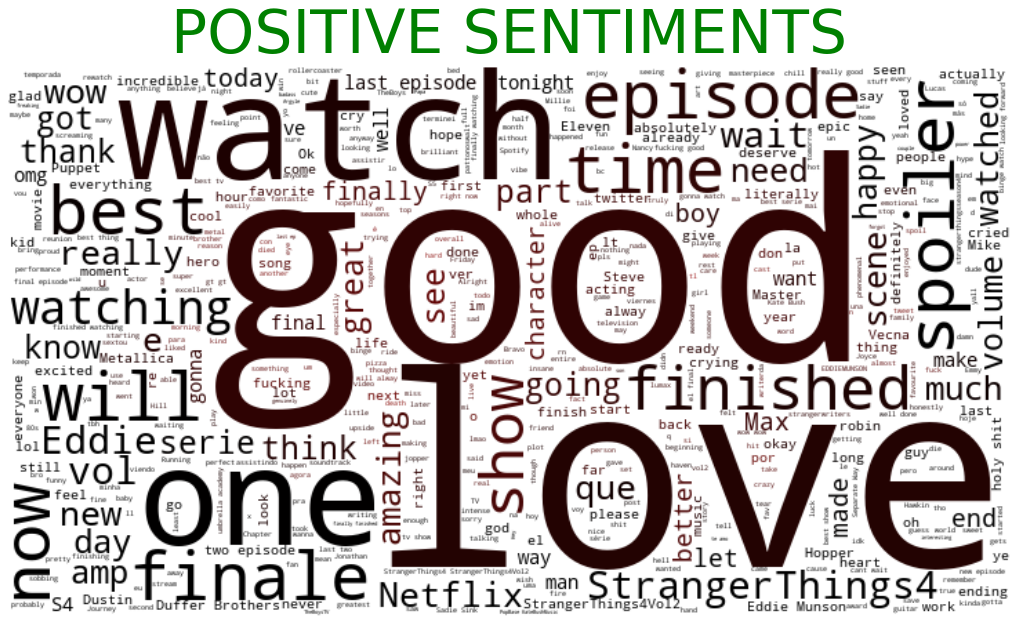

In [ ]:
text = " ".join(tweet for tweet in pos_df["Tweet"])
# Generate a word cloud image
mask = np.array(Image.open("images/Stranger_Things_logo.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("images/PositiveWordCloud.png", format="png")
plt.title("POSITIVE SENTIMENTS", fontsize=60, color= 'GREEN')
plt.show()

### Negative Sentiment Word Cloud

In [ ]:
neg_df = compare_df[compare_df["Sentiment"] == 'Negative'].reset_index(drop= True)
# neg_df

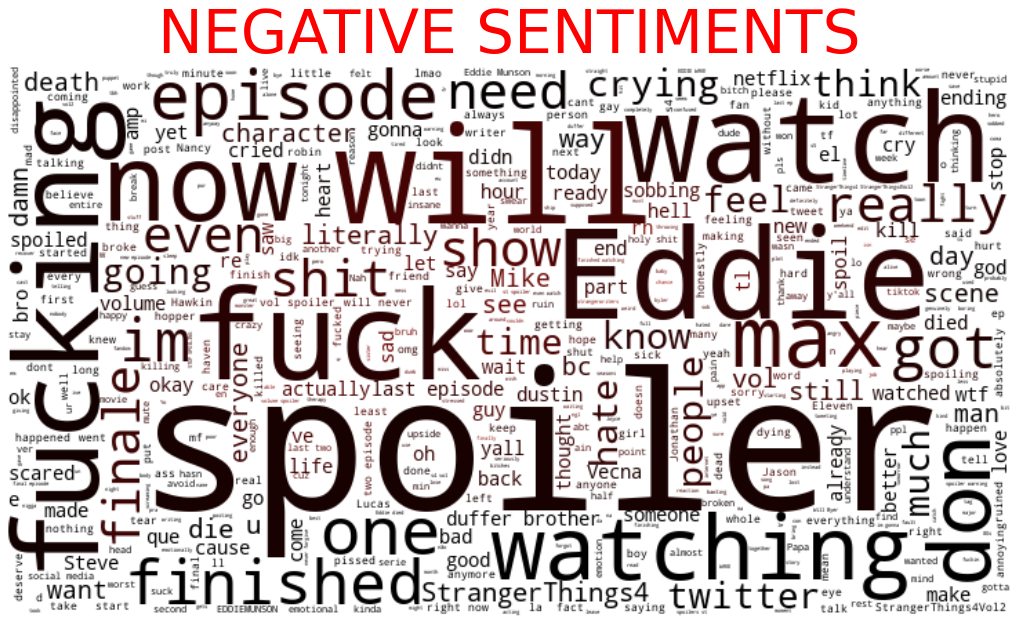

In [ ]:
text = " ".join(tweet for tweet in neg_df["Tweet"])
# Generate a word cloud image
mask = np.array(Image.open("images/Stranger_Things_logo.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("images/NegativeWordCloud.png", format="png")
plt.title("NEGATIVE SENTIMENTS", fontsize=60, color= 'red')
plt.show()

![neg](https://www.themarysue.com/wp-content/uploads/2022/06/305d482333d1d0264150b018dea79b6c.gif)

## **Model Evaluation By Human**

### Printing model-predicted positive tweets

In [ ]:
import random
l = dict(enumerate(pos_df['Tweet']))
k = random.randint(5, len(l))
result = {key: l[key] for key in l.keys() if key == k}
result

{13087: 'go! 📽🎞 #StrangerThings'}

### Printing model-predicted negative tweets

In [ ]:
l = dict(enumerate(neg_df['Tweet']))
k = random.randint(5, len(l))
result = {key: l[key] for key in l.keys() if key == k}
result

{21932: 'this fake Zac Efron don is very very annoying #StrangerThings'}

## **CONCLUSION**

- The model predicted that there are more negative tweet than positive tweets but from the human evaluation, most of the negative tweets are considered positive in a business way.
- From the negative analysis you can induce that the series made alot of people sober, hence the higher rate of negavtive sentiment.
**NOTE:** The roberta model is very good as it is trained on millions of tweets. Nonetheless, understanding human conversation most of the times requires human initiative.

## **THE END !!!**

![cc](https://s.yimg.com/ny/api/res/1.2/vbGcdGWF.me3PUB7prSA2Q--/YXBwaWQ9aGlnaGxhbmRlcjt3PTY0MDtoPTMxMw--/https://s.yimg.com/uu/api/res/1.2/qhvwtAVYlyx5ATKiPv.0Og--~B/aD0yNDU7dz01MDE7YXBwaWQ9eXRhY2h5b24-/http://media.zenfs.com/en-US/homerun/hello_giggles_454/1ff6078d09d0e781f659f575bff44bea)